# 1.Define the problem and perform Exploratory Data Analysis


**Context**

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.


**Objective**

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

## 1.1 Read the data as an appropriate time series data


In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.seasonal as seasonal_decompose
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#We have two types of wine data : rose and sparkling lets read one by one
#read rose wine dataset

rose_data = pd.read_csv('/content/drive/MyDrive/TSF/Rose.csv')



In [4]:
rose_data.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
rose_data.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [6]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(rose_data))

In [7]:
import calendar
rose_data['Month'] = dates.month
rose_data['Month'] = rose_data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names
rose_data['Year'] = dates.year

In [8]:
rose_data.drop(['YearMonth'], axis=1, inplace=True)
rose_data.rename(columns={'Rose':'Rose_wine-Sales'}, inplace=True)
rose_data = rose_data[['Month', 'Year', 'Rose_wine-Sales']]

In [9]:
rose_data.set_index(dates, inplace=True)

In [10]:
rose_data.head(5)

,Month,Year,Rose_wine-Sales
1980-01-01,Jan,1980,112.0
1980-02-01,Feb,1980,118.0
1980-03-01,Mar,1980,129.0
1980-04-01,Apr,1980,99.0
1980-05-01,May,1980,116.0



## 1.2 Plot the data



In [11]:
# extract out the time-series
sales_rs = rose_data['Rose_wine-Sales']

Text(0, 0.5, 'Rose Wine Sales')

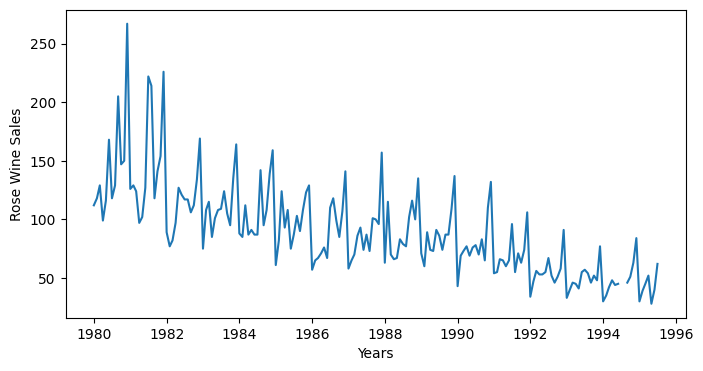

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(sales_rs)
plt.xlabel('Years')
plt.ylabel('Rose Wine Sales')

## 1.3 Perform EDA



In [13]:
#Checking the structure of rose dataset
sales_rs.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Series name: Rose_wine-Sales
Non-Null Count  Dtype  
--------------  -----  
185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [14]:
monthly_sales_data = pd.pivot_table(rose_data, values = "Rose_wine-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
Aug,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
Dec,267.0,226.0,169.0,164.0,159.0,129.0,141.0,157.0,135.0,137.0,132.0,106.0,91.0,77.0,84.0,NaN
Feb,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
Jan,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
Jul,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
Jun,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
Mar,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0


In [15]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
Feb,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
Mar,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
Apr,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
Jun,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
Jul,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
Aug,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
Sep,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


<Axes: xlabel='Month'>

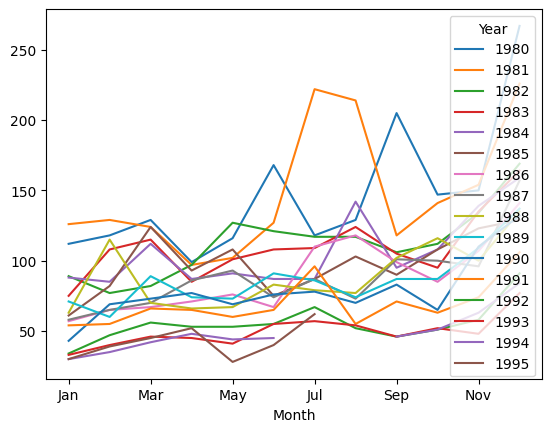

In [16]:
monthly_sales_data.plot()

In [17]:
yearly_sales_data = pd.pivot_table(rose_data, values = "Rose_wine-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


<Axes: xlabel='Year'>

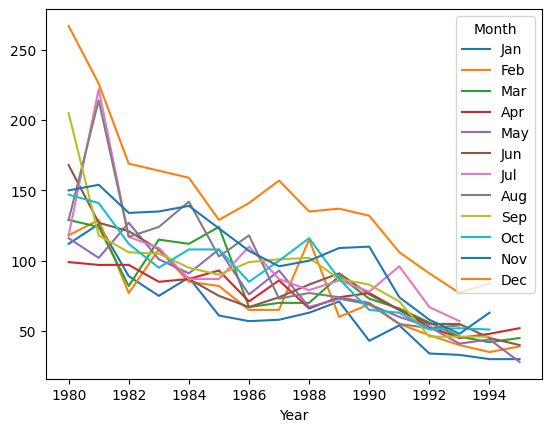

In [18]:
yearly_sales_data.plot()

<Axes: >

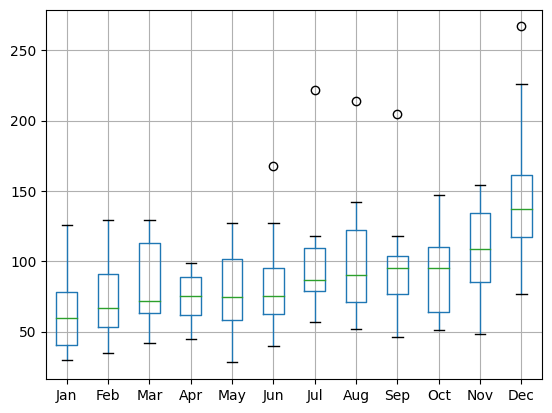

In [19]:
yearly_sales_data.boxplot()

In [20]:
missing_values = rose_data.isnull().sum()
print(missing_values)


Month              0
Year               0
Rose_wine-Sales    2
dtype: int64


In [21]:
rose_data['Rose_wine-Sales'] = rose_data['Rose_wine-Sales'].fillna(method='ffill')  # Example: Forward fill


<ipython-input-21-6b159ce0dd93>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rose_data['Rose_wine-Sales'] = rose_data['Rose_wine-Sales'].fillna(method='ffill')  # Example: Forward fill


In [22]:
rose_data.isnull().sum()

,0
Month,0
Year,0
Rose_wine-Sales,0


In [23]:
# # Linear interpolation
# df_interpolated_linear = rose_data.interpolate(method='linear')

# # Time-based interpolation (requires the index to be a datetime)
# df_interpolated_time = rose_data.interpolate(method='time')

# # Spline interpolation
# df_interpolated_spline = rose_data.interpolate(method='spline', order=2)

In [24]:
# Drop the 'Year' and 'Month' columns from the DataFrame
rose_data = rose_data.drop(['Year', 'Month'], axis=1)

## 1.4 Perform Decomposition

In [25]:
# Find duplicates excluding the first occurrence
duplicates_only = rose_data[rose_data.index.duplicated(keep='first')]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates_only)

# Print the count of duplicate occurrences
print(f"Number of duplicate rows: {duplicates_only.shape[0]}")

Duplicate rows:
Empty DataFrame
Columns: [Rose_wine-Sales]
Index: []
Number of duplicate rows: 0


In [26]:
#rose_data = rose_data.drop_duplicates()

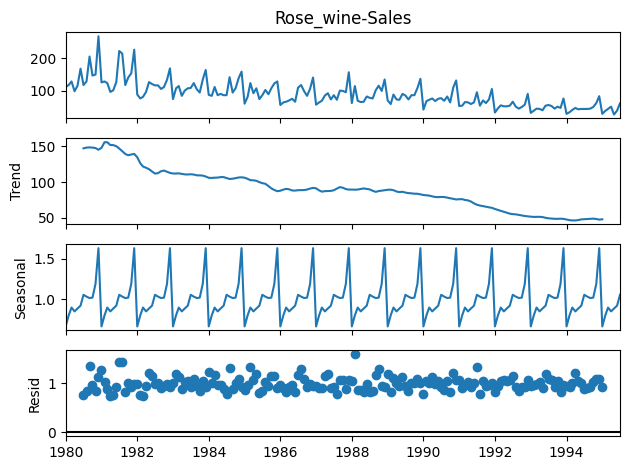

In [27]:
result = sm.tsa.seasonal_decompose(rose_data['Rose_wine-Sales'], model='multiplicative', period=12)
result.plot()
plt.show()

## 2 Data Pre-processing

### 2.1 Missing value treatment

### 2.2 Visualize the processed data

### 2.3 Train-test split

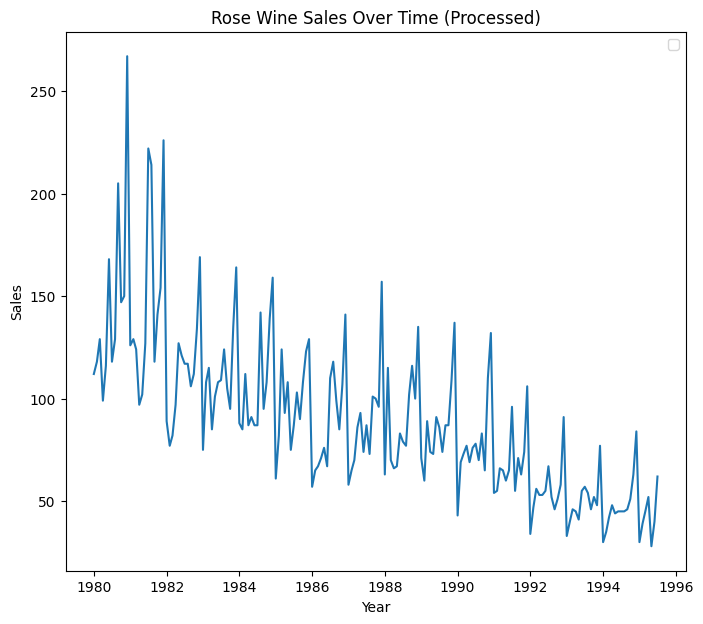

            Rose_wine-Sales
1980-01-01            112.0
1980-02-01            118.0
1980-03-01            129.0
1980-04-01             99.0
1980-05-01            116.0
...                     ...
1995-03-01             45.0
1995-04-01             52.0
1995-05-01             28.0
1995-06-01             40.0
1995-07-01             62.0

[187 rows x 1 columns]


In [28]:
#  #Step 2: Data Preprocessing
# # Missing value treatment
# # Check for missing values
# missing_values = rose_data.isnull().sum()
# print("Missing values in the dataset:\n", missing_values)

# # Since there are no missing values in the given dataset, no treatment is required. If there were missing values, you could use methods like interpolation or filling with the mean/median.
# # For demonstration, let's assume we use forward fill method to handle missing values if any.
# rose_data = rose_data.fillna(method='ffill')

# Step 3: Visualize the processed data
plt.figure(figsize=(8, 7))
plt.plot(rose_data['Rose_wine-Sales'])
plt.title('Rose Wine Sales Over Time (Processed)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()



# To see the modified DataFrame
print(rose_data)

# Step 4: Train-test split
train = rose_data[rose_data.index < '1993-01-01']
test = rose_data[rose_data.index >= '1993-01-01']


3.Model Building - Original Data

3.1 Build forecasting models

3.1.1 Linear regression

3.1.2 Simple Average

3.1.3 Moving Average

3.1.4 Exponential Models (Single, Double, Triple)

3.5 Check the performance of the models built

In [29]:
# Printing the Rose Wine Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose_wine-Sales
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-08-01,52.0
1992-09-01,46.0
1992-10-01,51.0
1992-11-01,58.0


Test Data


,Rose_wine-Sales
1993-01-01,33.0
1993-02-01,40.0
1993-03-01,46.0
1993-04-01,45.0
1993-05-01,41.0
1993-06-01,55.0
1993-07-01,57.0
1993-08-01,54.0
1993-09-01,46.0
1993-10-01,52.0


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.1 Linear Regression Model



For this particular linear regression, we are going to regress the 'Rose wine Saes' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [30]:
print(train.shape)
print(test.shape)

(156, 1)
(31, 1)


In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+156 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
Test Time instance 
 [156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose_wine-Sales,time
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose_wine-Sales,time
1992-08-01,52.0,152
1992-09-01,46.0,153
1992-10-01,51.0,154
1992-11-01,58.0,155
1992-12-01,91.0,156


First few rows of Test Data


,Rose_wine-Sales,time
1993-01-01,33.0,156
1993-02-01,40.0,157
1993-03-01,46.0,158
1993-04-01,45.0,159
1993-05-01,41.0,160


Last few rows of Test Data


,Rose_wine-Sales,time
1995-03-01,45.0,182
1995-04-01,52.0,183
1995-05-01,28.0,184
1995-06-01,40.0,185
1995-07-01,62.0,186


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose_wine-Sales'])


LinearRegression()

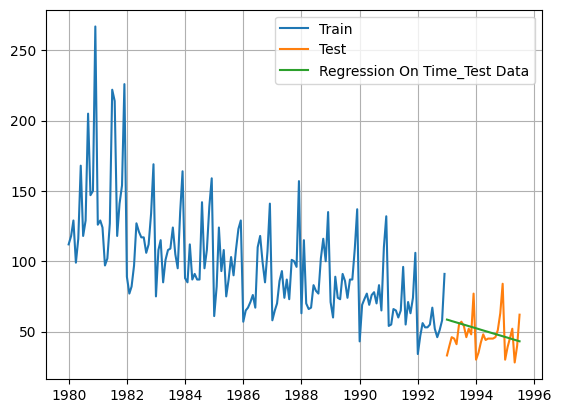

In [35]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose_wine-Sales'], label='Train')
plt.plot(test['Rose_wine-Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [36]:
#### Defining the functions for calculating the accuracy metrics.
from sklearn import metrics
### Model Evaluation
rmse_model1_test = metrics.mean_squared_error(test['Rose_wine-Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 13.674 


,Test RMSE
RegressionOnTime,13.674059


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.2 Simple Average Model

For this particular simple average method, we will forecast by using the average of the training values

In [37]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Rose_wine-Sales'].mean()
SimpleAverage_test.head()


,Rose_wine-Sales,mean_forecast
1993-01-01,33.0,98.365385
1993-02-01,40.0,98.365385
1993-03-01,46.0,98.365385
1993-04-01,45.0,98.365385
1993-05-01,41.0,98.365385


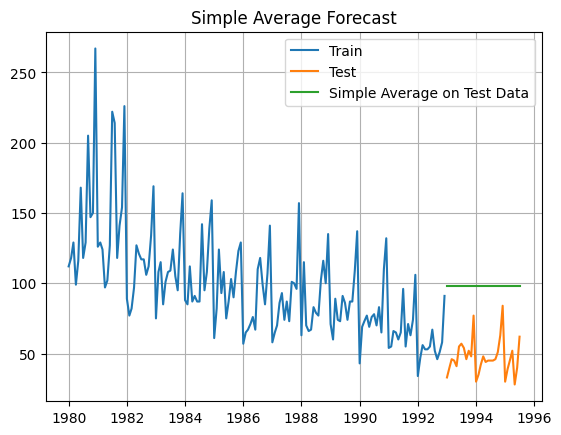

In [38]:
plt.plot(SimpleAverage_train['Rose_wine-Sales'], label='Train')
plt.plot(SimpleAverage_test['Rose_wine-Sales'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [39]:
#Model Evaluation
rmse_model3_test = metrics.mean_squared_error(test['Rose_wine-Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.433


In [40]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890


<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.2 Moving Average Model

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [41]:
MovingAverage = rose_data.copy()
MovingAverage.head()

,Rose_wine-Sales
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Trailing moving averages

In [42]:
MovingAverage['Trailing_2'] = MovingAverage['Rose_wine-Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose_wine-Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose_wine-Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose_wine-Sales'].rolling(9).mean()

MovingAverage.head()

,Rose_wine-Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


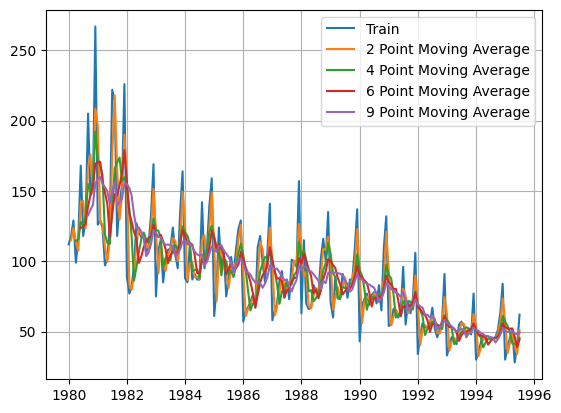

In [43]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose_wine-Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [44]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)]
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [45]:
trailing_MovingAverage_train.shape

(130, 5)

In [46]:
trailing_MovingAverage_test.shape

(57, 5)

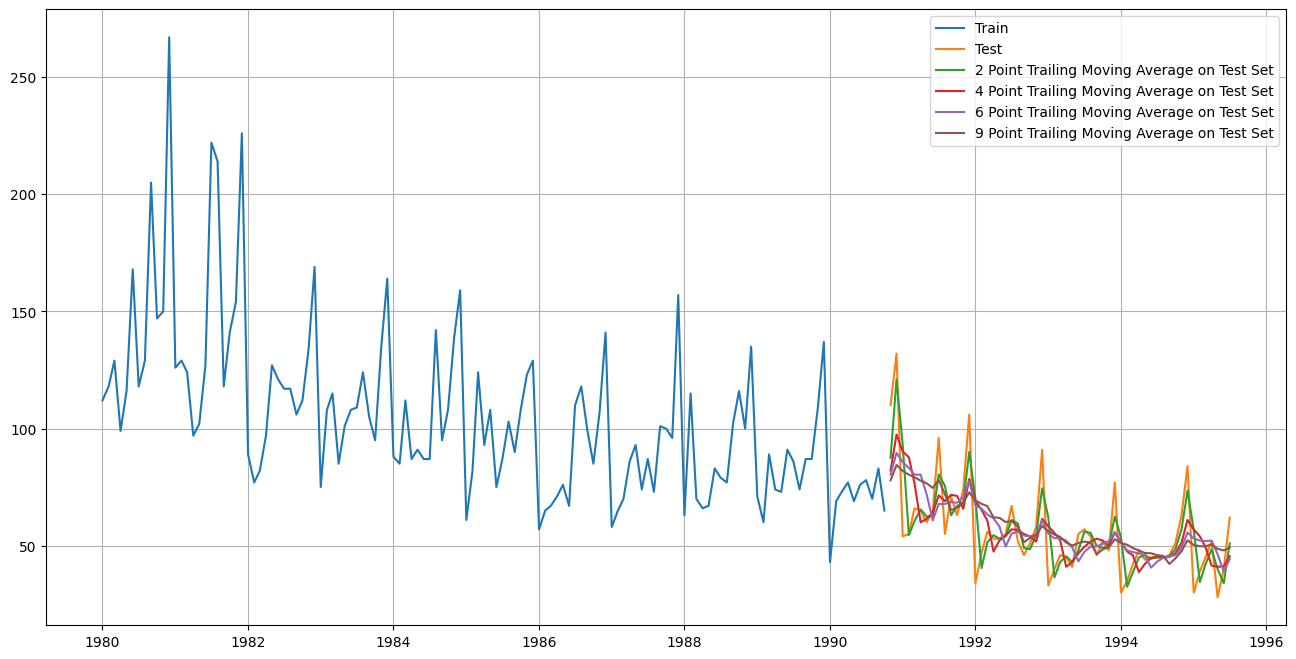

In [47]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose_wine-Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose_wine-Sales'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [48]:
## Test Data - RMSE  --> 2 point Trailing MA

import numpy as np
import pandas as pd
from sklearn import metrics

# Assuming 'test' is your DataFrame with the actual values
test_copy = test.copy()
# Calculate the moving averages for different windows
test_copy['Trailing_2'] = test_copy['Rose_wine-Sales'].rolling(window=2).mean()
test_copy['Trailing_4'] = test_copy['Rose_wine-Sales'].rolling(window=4).mean()
test_copy['Trailing_6'] = test_copy['Rose_wine-Sales'].rolling(window=6).mean()
test_copy['Trailing_9'] = test_copy['Rose_wine-Sales'].rolling(window=9).mean()

# Drop NaN values from the test set for each moving average
test_2 = test_copy.dropna(subset=['Trailing_2'])
test_4 = test_copy.dropna(subset=['Trailing_4'])
test_6 = test_copy.dropna(subset=['Trailing_6'])
test_9 = test_copy.dropna(subset=['Trailing_9'])

# Calculate RMSE for 2-point Moving Average
rmse_model4_test_2 = metrics.mean_squared_error(test_2['Rose_wine-Sales'], test_2['Trailing_2'], squared=False)
print("For 2-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_2)

# Calculate RMSE for 4-point Moving Average
rmse_model4_test_4 = metrics.mean_squared_error(test_4['Rose_wine-Sales'], test_4['Trailing_4'], squared=False)
print("For 4-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_4)

# Calculate RMSE for 6-point Moving Average
rmse_model4_test_6 = metrics.mean_squared_error(test_6['Rose_wine-Sales'], test_6['Trailing_6'], squared=False)
print("For 6-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_6)

# Calculate RMSE for 9-point Moving Average
rmse_model4_test_9 = metrics.mean_squared_error(test_9['Rose_wine-Sales'], test_9['Trailing_9'], squared=False)
print("For 9-point Moving Average Model forecast on the Test Data, RMSE is %3.3f" % rmse_model4_test_9)


For 2-point Moving Average Model forecast on the Test Data, RMSE is 8.417
For 4-point Moving Average Model forecast on the Test Data, RMSE is 11.341
For 6-point Moving Average Model forecast on the Test Data, RMSE is 12.146
For 9-point Moving Average Model forecast on the Test Data, RMSE is 12.938


In [49]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979


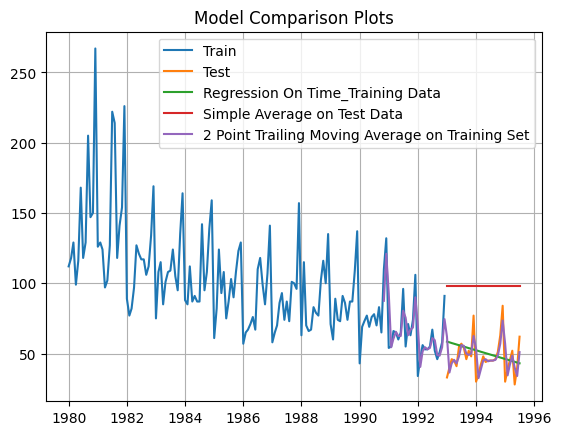

In [50]:
## Plotting on both Training and Test data

plt.plot(train['Rose_wine-Sales'], label='Train')
plt.plot(test['Rose_wine-Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

<font size = 5 color='SaddleBrown' style="font-family:verdana"> 3.1.3 Exponential Models

### A. SIMPLE EXPONENTIAL SMOOTHING

In [51]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)


In [52]:
# Printing the Rose wine Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose_wine-Sales
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1992-08-01,52.0
1992-09-01,46.0
1992-10-01,51.0
1992-11-01,58.0


Test Data


,Rose_wine-Sales
1993-01-01,33.0
1993-02-01,40.0
1993-03-01,46.0
1993-04-01,45.0
1993-05-01,41.0
1993-06-01,55.0
1993-07-01,57.0
1993-08-01,54.0
1993-09-01,46.0
1993-10-01,52.0


In [53]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.1085836905530673,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.02970907617708,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [54]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

,0
1993-01-01,63.057465
1993-02-01,63.057465
1993-03-01,63.057465
1993-04-01,63.057465
1993-05-01,63.057465
1993-06-01,63.057465
1993-07-01,63.057465
1993-08-01,63.057465
1993-09-01,63.057465
1993-10-01,63.057465


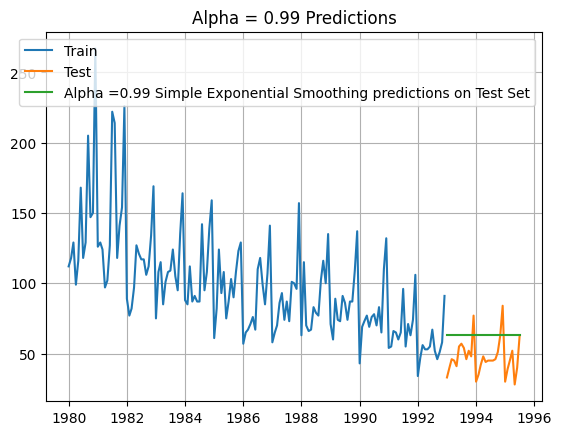

In [55]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [56]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [57]:

import statsmodels.tools.eval_measures as em
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 19.841991787743144
SES RMSE (calculated using statsmodels): 19.841991787743144


In [58]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])

resultsDF=pd.concat([resultsDf, resultsDf_3]) # Pass a list of DataFrames to pd.concat()


In [59]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 7.285010306951188e-05, 'smoothing_trend': 1.7719137414532712e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.74880349565953, 'initial_trend': -0.5144188835778536, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

,0
1993-01-01,57.985022
1993-02-01,57.470603
1993-03-01,56.956184
1993-04-01,56.441765
1993-05-01,55.927346
1993-06-01,55.412927
1993-07-01,54.898508
1993-08-01,54.384089
1993-09-01,53.869670
1993-10-01,53.355252


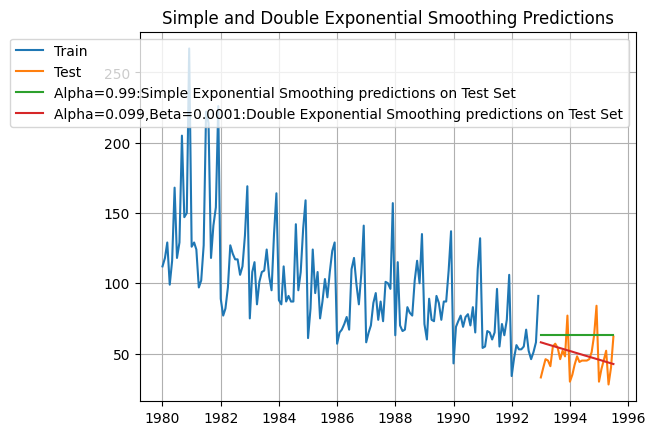

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [62]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 13.553459975664277


In [63]:
resultsDf4 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460


In [64]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09509083303858493, 'smoothing_trend': 7.769745611839437e-05, 'smoothing_seasonal': 0.002521115063116996, 'damping_trend': nan, 'initial_level': 146.9050470558056, 'initial_trend': -0.6151877914985002, 'initial_seasons': array([-30.02031629, -18.32351441,  -9.8563535 , -18.9937688 ,
       -11.8086869 ,  -6.56456019,   5.38204   ,   6.36920981,
         3.94321345,   2.25447711,  19.12137587,  60.09787995]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

,0
1993-01-01,20.292930
1993-02-01,31.374936
1993-03-01,39.225909
1993-04-01,29.474811
1993-05-01,36.043157
1993-06-01,40.672218
1993-07-01,52.000546
1993-08-01,52.369403
1993-09-01,49.330601
1993-10-01,47.027637


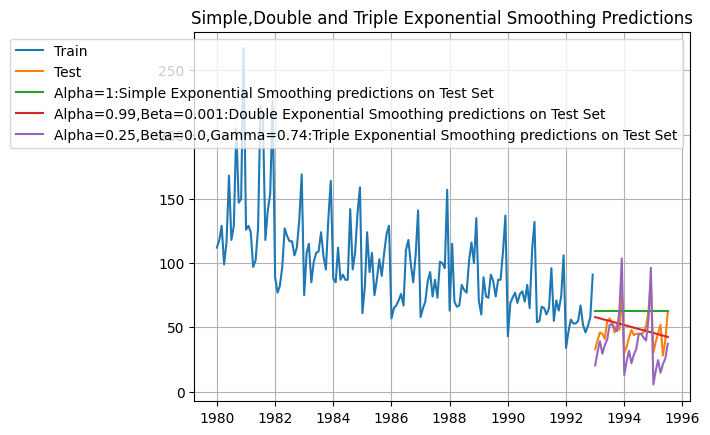

In [66]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [67]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 15.490693928782463


In [68]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.490694


In [69]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10223048020275895, 'smoothing_trend': 2.290097365316908e-07, 'smoothing_seasonal': 1.940431190344549e-05, 'damping_trend': nan, 'initial_level': 147.00955829806568, 'initial_trend': -0.6188372039050588, 'initial_seasons': array([0.74112068, 0.83897643, 0.92355398, 0.81603745, 0.90685658,
       0.97699157, 1.09375508, 1.13432621, 1.07229327, 1.05486517,
       1.2285284 , 1.69235836]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

,0
1993-01-01,37.736304
1993-02-01,42.200279
1993-03-01,45.882983
1993-04-01,40.036802
1993-05-01,43.930897
1993-06-01,46.723507
1993-07-01,51.631041
1993-08-01,52.843519
1993-09-01,49.290839
1993-10-01,47.836945


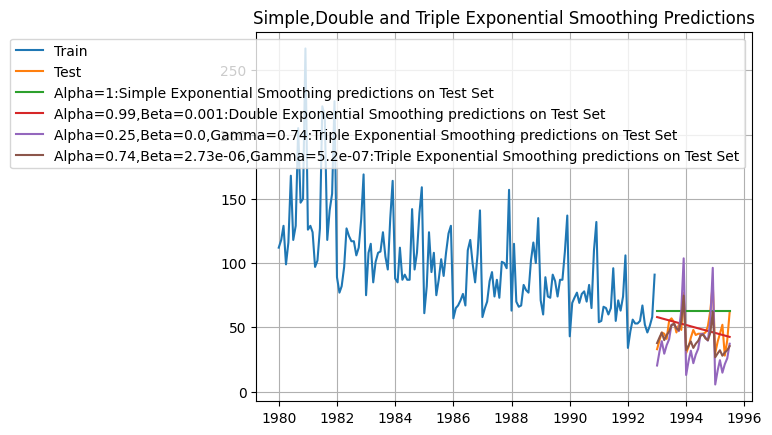

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [72]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 9.94515290407576


In [73]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.490694
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",9.945153


Conclusion: The TES model with parameters (Alpha=0.74, Beta=2.73e-06, Gamma=5.2e-07, Gamma=0) provides the most accurate predictions in this case, significantly outperforming the other models. The DES model also performs relatively well, while the other TES model and SES model are less accurate.

## 4. Check for Stationarity

### 4.1 Check for stationarity

### 4.2 Make the data stationary (if needed)

<Figure size 1000x600 with 0 Axes>

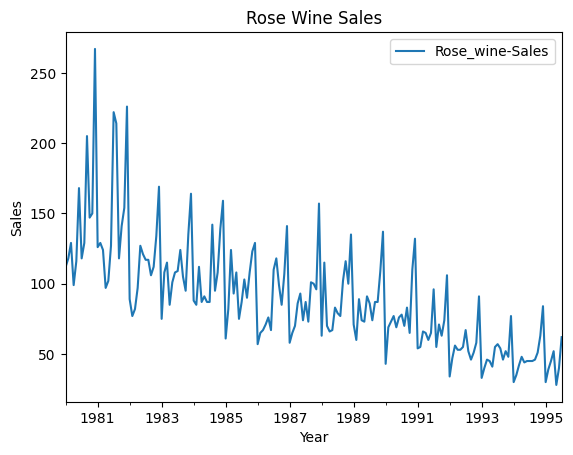

ADF Test for Original Data:
ADF Statistic: -1.874855541719994
p-value: 0.34398071933430197
Critial Values:
   1%, -3.4687256239864017
Critial Values:
   5%, -2.8783961376954363
Critial Values:
   10%, -2.57575634100705

ADF Test for Differenced Data:
ADF Statistic: -3.8450642364447005
p-value: 0.0024784775027724905
Critial Values:
   1%, -3.470126426071447
Critial Values:
   5%, -2.8790075987120027
Critial Values:
   10%, -2.5760826967621644


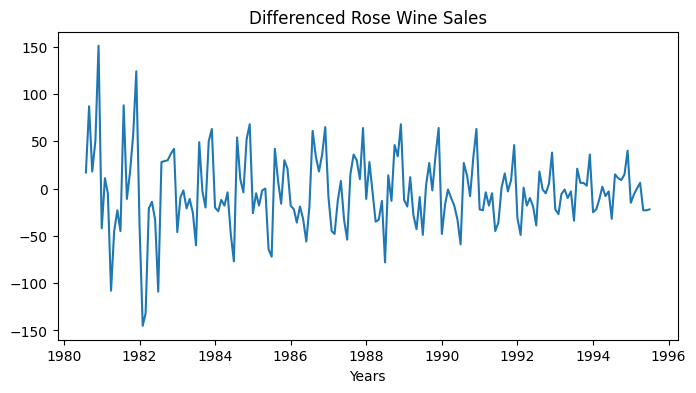

In [74]:
# Assuming 'Rose_wine-Sales' is the name of the Series, not a column
stationary_data = rose_data.dropna()  # Drop missing values

# # Step 3: Check for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')


# Visualize the data
plt.figure(figsize=(10, 6))
stationary_data.plot()
plt.title('Rose Wine Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Perform ADF test
print("ADF Test for Original Data:")
adf_test(stationary_data)

# Step 4: Differencing to make the data stationary (if needed)
plt.figure(figsize=(8, 4))
plt.plot(stationary_data.diff(7).dropna()) # Drop missing values after differencing
plt.xlabel('Years')
plt.title('Differenced Rose Wine Sales')

# Re-check for stationarity after differencing
print("\nADF Test for Differenced Data:")
adf_test(stationary_data.diff(7).dropna()) # Drop missing values after differencing

## 5. Model Building - Stationary Data

### 5.1 Generate ACF & PACF Plot and find the AR, MA values.




In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

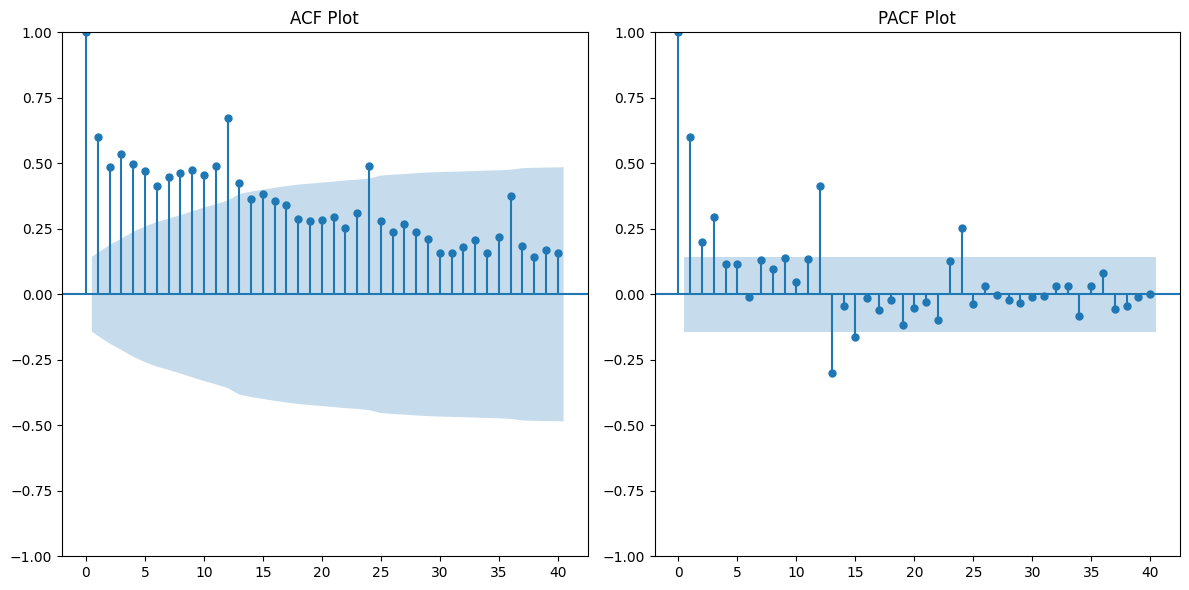

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_data, lags=40, ax=plt.gca())
plt.title('ACF Plot')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(stationary_data, lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


 AutoCorrelation Function (ACF):
MA Process: For a Moving Average (MA) process of order
𝑞
q, the ACF will show significant correlations up to lag
𝑞
q and then cut off (drop to near zero) for higher lags.
Identification: The ACF plot helps in identifying the order of the MA component by showing the number of significant lags.

Here the value of q is 2

Partial AutoCorrelation Function (PACF):
AR Process: For an AutoRegressive (AR) process of order
𝑝
p, the PACF will show significant correlations up to lag
𝑝
p and then cut off for higher lags.
Identification: The PACF plot helps in identifying the order of the AR component by showing the number of significant lags.

here the value of p is 3



### 5.2 Build different ARIMA models - Auto ARIMA Manual ARIMA




# <u> Auto Arima </u>

In [77]:
!pip install pmdarima


In [78]:
import pmdarima as pm
model = pm.auto_arima(rose_data['Rose_wine-Sales'],start_p=1,start_q=1,test='adf',max_p=3,max_q=2,m=1,d=None,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

#print model summary

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1788.452, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2247.685, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1860.237, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2084.060, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1786.736, Time=1.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1839.082, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1786.651, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1811.940, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1786.671, Time=3.89 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1784.743, Time=3.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1785.647, Time=1.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1784.649, Time=4.91 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1785.551, Time=4.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1786.712, Time=7.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept

In [79]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

best_model = ARIMA(stationary_data,order = (3,0,1))
best_results = best_model.fit()

In [80]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [81]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [82]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [83]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [84]:
# Compute the root mean square error
mse = ((testCopy1['Rose_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 17.293


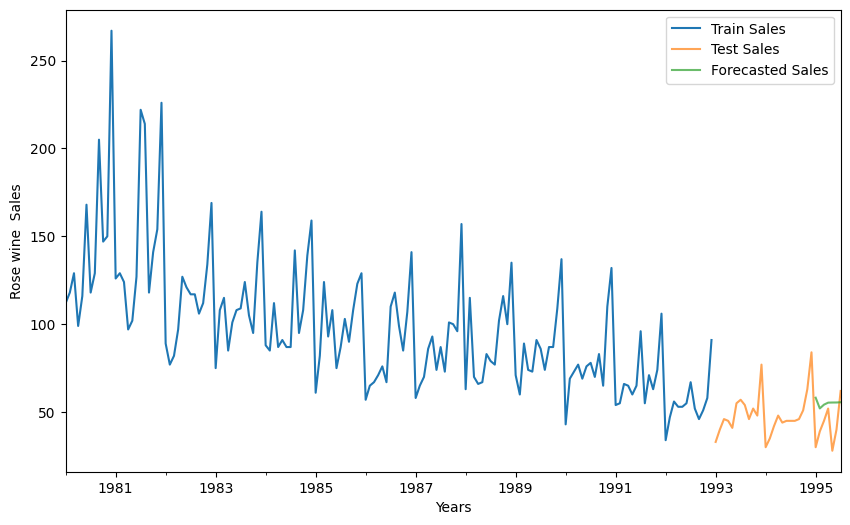

In [85]:
axis = train['Rose_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine  Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [86]:
resultsDf_7 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best Auto ARIMA Model : ARIMA(3,0,1)'])

resultsDf_7

resultsDf=pd.concat([resultsDf,resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.490694
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",9.945153
"Best Auto ARIMA Model : ARIMA(3,0,1)",17.292957


## <u> Manual ARIMA Model
<font color='blue'> building to estimate best'p' , 'd' , 'q' paramters ( Lowest AIC Approach )</u> </font>

In [87]:

# Define the p parameter to take any value between 0 and 2
p= range(1,4)

# Define the q parameter to take any value between 0 and 2
q = range(1, 3)

In [88]:
import itertools
d= range(0,8)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print(pdq_ar)
print(pdq_arma)
print(pdq)
print(seasonal_pdq)

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]
[(1, 0, 1), (1, 0, 2), (2, 0, 1), (2, 0, 2), (3, 0, 1), (3, 0, 2)]
[(1, 0, 1), (1, 0, 2), (1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (1, 3, 1), (1, 3, 2), (1, 4, 1), (1, 4, 2), (1, 5, 1), (1, 5, 2), (1, 6, 1), (1, 6, 2), (1, 7, 1), (1, 7, 2), (2, 0, 1), (2, 0, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2), (2, 3, 1), (2, 3, 2), (2, 4, 1), (2, 4, 2), (2, 5, 1), (2, 5, 2), (2, 6, 1), (2, 6, 2), (2, 7, 1), (2, 7, 2), (3, 0, 1), (3, 0, 2), (3, 1, 1), (3, 1, 2), (3, 2, 1), (3, 2, 2), (3, 3, 1), (3, 3, 2), (3, 4, 1), (3, 4, 2), (3, 5, 1), (3, 5, 2), (3, 6, 1), (3, 6, 2), (3, 7, 1), (3, 7, 2)]
[(1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 1, 12), (1, 2, 2, 12), (1, 3, 1, 12), (1, 3, 2, 12), (1, 4, 1, 12), (1, 4, 2, 12), (1, 5, 1, 12), (1, 5, 2, 12), (1, 6, 1, 12), (1, 6, 2, 12), (1, 7, 1, 12), (1, 7, 2, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 1, 12), (2, 2, 2, 12), (2, 3, 1, 12), (2, 3, 2, 12), (2, 4, 1,

In [89]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [90]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

for param in pdq:
    ARIMA_model = ARIMA(stationary_data,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    # Use concat to append the new row to the main DataFrame
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

ARIMA(1, 0, 1) - AIC:1788.3152191426245


<ipython-input-90-985b044de721>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)


ARIMA(1, 0, 2) - AIC:1785.551403868062
ARIMA(1, 1, 1) - AIC:1772.7245350863789
ARIMA(1, 1, 2) - AIC:1770.7336413565627
ARIMA(1, 2, 1) - AIC:1827.1119336894171


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 2) - AIC:1767.518488304433


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 1) - AIC:1960.7796942395705


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 2) - AIC:1831.7009733341022


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 1) - AIC:2122.480234426138


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 4, 2) - AIC:1963.7493743919235


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 5, 1) - AIC:2297.3544895202463


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 5, 2) - AIC:2123.086636781353


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 6, 1) - AIC:2481.101255035246
ARIMA(1, 6, 2) - AIC:2296.018210409664


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 7, 1) - AIC:2671.3460890291963


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 7, 2) - AIC:2481.4624009558484


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:1786.6362066826148
ARIMA(2, 0, 2) - AIC:1784.6492350493804
ARIMA(2, 1, 1) - AIC:1772.6447602224898
ARIMA(2, 1, 2) - AIC:1772.663740263477
ARIMA(2, 2, 1) - AIC:1799.1156717324618


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2) - AIC:1768.101361994431
ARIMA(2, 3, 1) - AIC:1900.8644721923629


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 2) - AIC:1804.8852164890336
ARIMA(2, 4, 1) - AIC:2038.3611150569247


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 4, 2) - AIC:1905.2993048229714
ARIMA(2, 5, 1) - AIC:2190.9408486315415


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 5, 2) - AIC:2040.562863506787
ARIMA(2, 6, 1) - AIC:2352.5832999675786


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 6, 2) - AIC:2191.3420954892867
ARIMA(2, 7, 1) - AIC:2521.8183500642544


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 7, 2) - AIC:2351.3697602926586
ARIMA(3, 0, 1) - AIC:1786.5483310805826
ARIMA(3, 0, 2) - AIC:1786.5754953327903
ARIMA(3, 1, 1) - AIC:1773.5661529363285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1774.6249209627888
ARIMA(3, 2, 1) - AIC:1795.6312148350275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 2) - AIC:1795.8762829649313
ARIMA(3, 3, 1) - AIC:1875.8480376513758


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 3, 2) - AIC:1893.9830030944704
ARIMA(3, 4, 1) - AIC:1995.5060739798014


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 4, 2) - AIC:2028.3914467755917
ARIMA(3, 5, 1) - AIC:2135.045451908555


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 5, 2) - AIC:2178.2614504911594
ARIMA(3, 6, 1) - AIC:2284.4231296871253


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 6, 2) - AIC:2136.7204458796095


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 7, 1) - AIC:2440.623770865067


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 7, 2) - AIC:2287.742152782669


In [91]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
5,"(1, 2, 2)",1767.518488
21,"(2, 2, 2)",1768.101362
3,"(1, 1, 2)",1770.733641
18,"(2, 1, 1)",1772.644760
19,"(2, 1, 2)",1772.663740


#### <u>Building ARIMA model with best parameters p,d,q</u>

In [92]:

best_model = ARIMA(stationary_data,order = (2,1,3))
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:        Rose_wine-Sales   No. Observations:                  187
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -875.745
Date:                Sun, 18 Aug 2024   AIC                           1763.489
Time:                        18:09:02   BIC                           1782.844
Sample:                    01-01-1980   HQIC                          1771.333
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6929      0.041    -40.797      0.000      -1.774      -1.612
ar.L2         -0.8629      0.041    -20.924      0.000      -0.944      -0.782
ma.L1          0.9805      0.168      5.847      0.0

#### <u>Calculating RMSE for best ARIMA model </u>

In [94]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [95]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [96]:
pred99

In [97]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [98]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [99]:
print(testCopy1.index)
print(sales_ts_forecasted.index)

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01', '1993-11-01', '1993-12-01',
               '1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
               '1994-09-01', '1994-10-01', '1994-11-01', '1994-12-01',
               '1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', freq='MS')


In [100]:
# Compute the root mean square error
mse = ((testCopy1['Rose_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 15.95


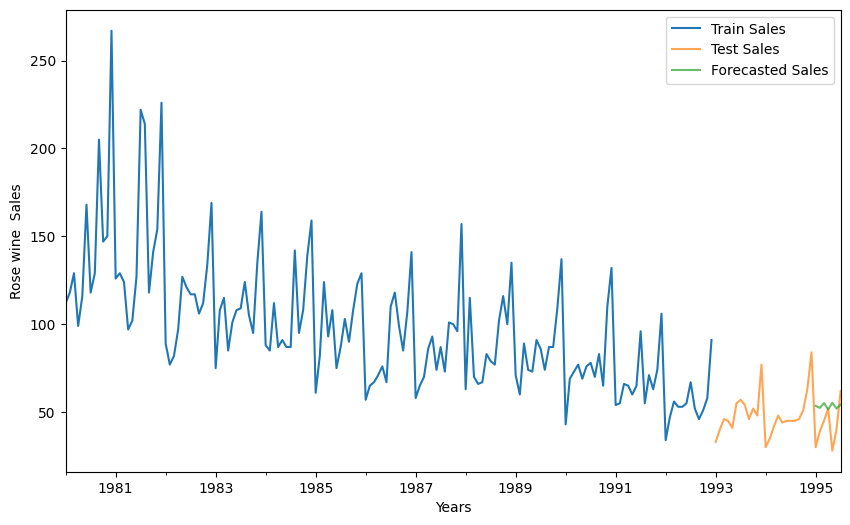

In [101]:
axis = train['Rose_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose wine  Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [102]:
resultsDf_8 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARIMA Manual Model : ARIMA(2,1,3)'])

resultsDf_8

resultsDf=pd.concat([resultsDf,resultsDf_8])
resultsDf


,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.490694
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",9.945153
"Best Auto ARIMA Model : ARIMA(3,0,1)",17.292957


### 5.3 Build different SARIMA models Auto SARIMA - Manual SARIMA




## SARIMA Model

Auto SARIMA

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1854.380, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1750.322, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1852.391, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1830.083, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1722.396, Time=0.67 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1712.318, Time=1.50 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1710.778, Time=0.68 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1784.865, Time=0.38 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1712.408, Time=1.59 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1759.892, Time=1.88 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1731.240, Time=0.33 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

 ARIMA(3,1,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1681.050, Time=0.61 sec
 ARIMA(3,1,1)(1,0,2)[12]             : AIC=1647.420, Time=3.52 sec
 ARIMA(2,1,1)(2,0,1)[12]             : AIC=1646.489, Time=5.32 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=1644.489, Time=2.43 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=1721.353, Time=0.51 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1680.148, Time=0.56 sec
 ARIMA(2,1,1)(1,0,2)[12]             : AIC=1646.489, Time=2.41 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1772.645, Time=0.13 sec
 ARIMA(2,1,1)(0,0,2)[12]             : AIC=1696.788, Time=1.24 sec
 ARIMA(2,1,1)(2,0,0)[12]             : AIC=1656.984, Time=1.28 sec
 ARIMA(2,1,1)(2,0,2)[12]             : AIC=1649.230, Time=5.61 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=1646.873, Time=2.37 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=1675.386, Time=1.21 sec
 ARIMA(2,1,2)(1,0,1)[12]             : AIC=1643.397, Time=0.92 sec
 

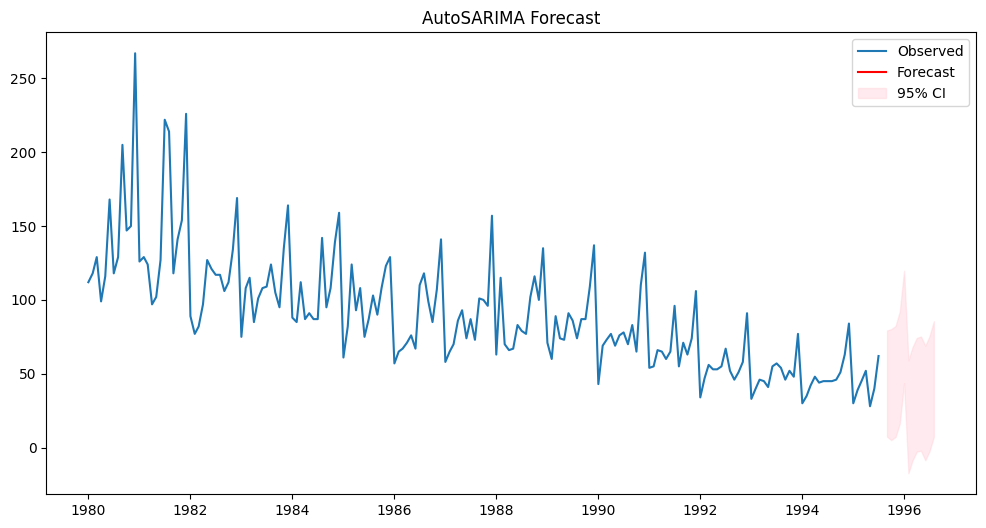

In [103]:
# Define seasonal period, e.g., 12 for monthly data with yearly seasonality
seasonal_period = 12
# Fit AutoSARIMA model
auto_model = pm.auto_arima(rose_data['Rose_wine-Sales'],
                           start_p=1,
                           start_q=1,
                           seasonal=True,
                           m=seasonal_period,
                           stepwise=True,
                           trace=True)

# Print the summary of the best model
print(auto_model.summary())

# Forecast future values
n_forecast = 12  # Forecasting 12 months ahead
forecast, conf_int = auto_model.predict(n_periods=n_forecast, return_conf_int=True)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=rose_data.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(rose_data.index, rose_data['Rose_wine-Sales'], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast')
plt.fill_between(conf_int_df.index, conf_int_df['Lower CI'], conf_int_df['Upper CI'], color='pink', alpha=0.3, label='95% CI')
plt.title('AutoSARIMA Forecast')
plt.legend()
plt.show()

In [104]:
best_model = sm.tsa.statespace.SARIMAX(stationary_data,
                                      order=(1, 1, 2),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [105]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [106]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [107]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [108]:
testCopy1['sales_ts_forecasted'] = sales_ts_forecasted.reindex(testCopy1.index)

In [109]:
# Compute the root mean square error
mse = ((testCopy1['Rose_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 11.347


In [110]:
resultsDf_10 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best auto SARIMA Model :SARIMAX(1, 1, 2)x(1, 0, [1], 12) '])

resultsDf=pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,13.674059
SimpleAverageModel,52.432890
2pointTrailingMovingAverage,8.416749
4pointTrailingMovingAverage,11.341001
6pointTrailingMovingAverage,12.145530
9pointTrailingMovingAverage,12.937979
"Alpha=1,Beta=0.0189:DES",13.553460
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",15.490694
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",9.945153
"Best Auto ARIMA Model : ARIMA(3,0,1)",17.292957


In [111]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [112]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [113]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

SARIMA_AIC_list = [] # Create an empty list to store the results

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(stationary_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        # Append the results as a dictionary to the list
        SARIMA_AIC_list.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic})

# Create the DataFrame after the loop
SARIMA_AIC = pd.DataFrame(SARIMA_AIC_list)

SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1577.6877548230036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1417.3677566014444
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1430.6065988065484
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1291.8754950436235
SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:1353.0508895683172
SARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC:1242.6461607393426
SARIMA(0, 1, 0)x(1, 3, 1, 12) - AIC:1335.6890511620759
SARIMA(0, 1, 0)x(1, 3, 2, 12) - AIC:1223.5835049575066
SARIMA(0, 1, 0)x(1, 4, 1, 12) - AIC:1286.0742092671476
SARIMA(0, 1, 0)x(1, 4, 2, 12) - AIC:1166.7292179140863
SARIMA(0, 1, 0)x(1, 5, 1, 12) - AIC:1263.720254344453
SARIMA(0, 1, 0)x(1, 5, 2, 12) - AIC:1130.746670093836
SARIMA(0, 1, 0)x(1, 6, 1, 12) - AIC:1227.4005626985913
SARIMA(0, 1, 0)x(1, 6, 2, 12) - AIC:1064.4164794872147
SARIMA(0, 1, 0)x(1, 7, 1, 12) - AIC:1164.627880198755


In [ ]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

SARMA_AIC.sort_values(by='AIC',ascending=True).head()

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(stationary_data,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

Calculating RMSE for best SARIMA model

---



In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=True, full_results=True)

In [ ]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [ ]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
# Compute the root mean square error
mse = ((testCopy1['Rose_wine-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
axis = train['Rose_wine-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose_wine-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
resultsDf_11= pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best  Manual SARIMA Model : SARIMA(2,0,0)'])

resultsDf=pd.concat([resultsDf,resultsDf_11])
resultsDf

### 5.4 Check the performance of the models built

Given on the earlier sections in the form of table .Please check

## 6.Compare the performance of the models

### 6.1 Compare the performance of all the models built



### 6.2 Choose the best model with proper rationale

### 6.3 Rebuild the best model using the entire data



#### <u>Forecast sales using the best fit SARIMA model as per RMSE </u>

### 6.4 Make a forecast for the next 12 months

In [ ]:
predicted_manual_SARIMA_full_data = best_results.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).head()

## 7.Actionable Insights & Recommendations

### 7.1 Conclude with the key takeaways (actionable insights and recommendations) for the business